In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from Preprocessingfunctions import convertclock
logs=pd.read_csv('shot_logs.csv')

In [29]:
print(type(logs.iloc[0])) 

<class 'pandas.core.series.Series'>


In [2]:
numerical=logs[['FINAL_MARGIN','SHOT_NUMBER','PERIOD','GAME_CLOCK','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST']].copy(deep=True)



In [3]:
numerical['GAME_CLOCK']=numerical['GAME_CLOCK'].apply(convertclock)
numerical['GAME_CLOCK']=pd.to_numeric(numerical['GAME_CLOCK'], errors='coerce')



In [32]:
print(numerical['GAME_CLOCK'].head())
print(numerical.dtypes)

0     69
1     14
2      0
3    707
4    634
Name: GAME_CLOCK, dtype: int64
FINAL_MARGIN        int64
SHOT_NUMBER         int64
PERIOD              int64
GAME_CLOCK          int64
SHOT_CLOCK        float64
DRIBBLES            int64
TOUCH_TIME        float64
SHOT_DIST         float64
PTS_TYPE            int64
CLOSE_DEF_DIST    float64
dtype: object


Conduct Shapiro-Wilks Test to determine distribution of numerical features

In [6]:
for col in numerical:
    statistic,p_value=shapiro(numerical[col])
    if p_value >0.05:
        print(f'p-value for {col} is normally distributed') 
    else:
        print(f'p-value for {col} is not normally distributed')

p-value for FINAL_MARGIN is not normally distributed
p-value for SHOT_NUMBER is not normally distributed
p-value for PERIOD is not normally distributed
p-value for GAME_CLOCK is not normally distributed
p-value for SHOT_CLOCK is not normally distributed
p-value for DRIBBLES is not normally distributed
p-value for TOUCH_TIME is not normally distributed
p-value for SHOT_DIST is not normally distributed
p-value for PTS_TYPE is not normally distributed
p-value for CLOSE_DEF_DIST is not normally distributed


/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 128069.
  res = hypotest_fun_out(*samples, **kwds)


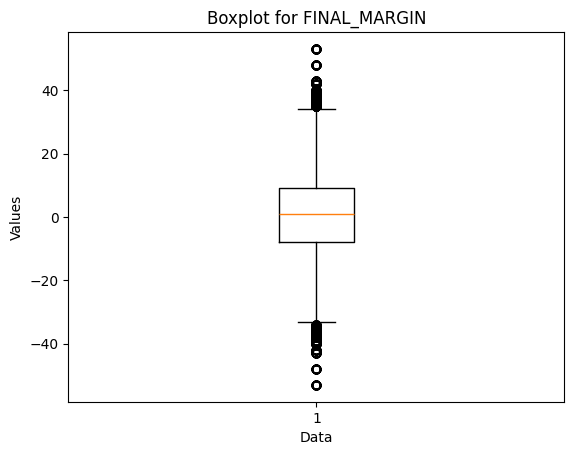

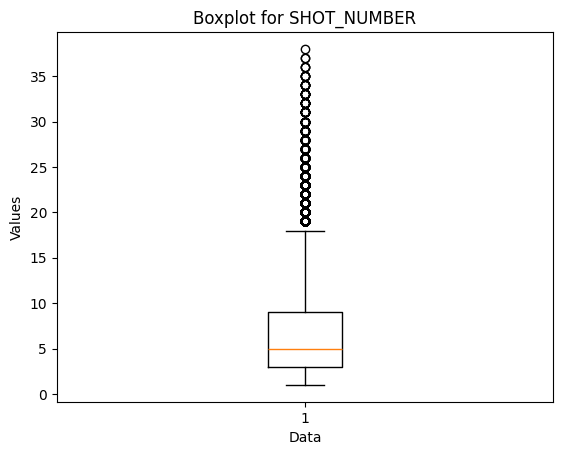

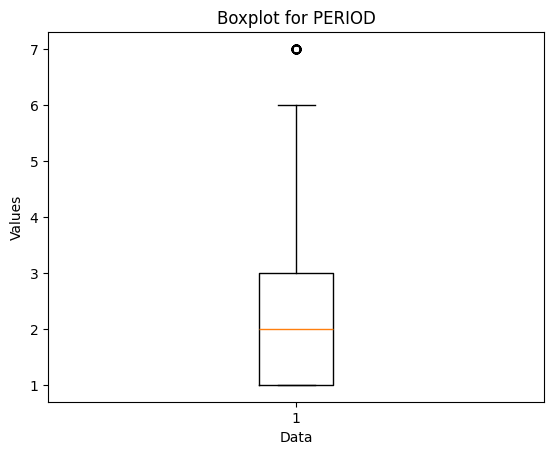

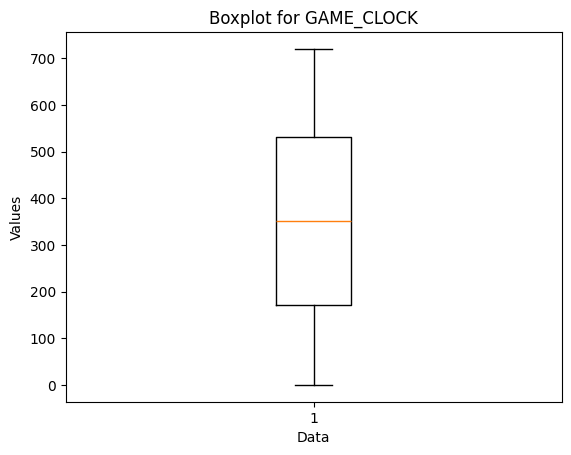

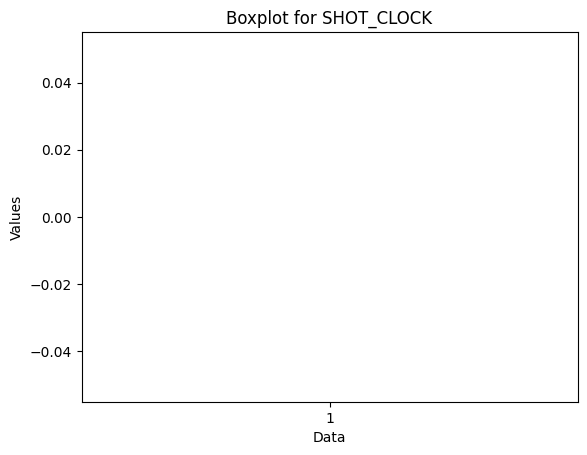

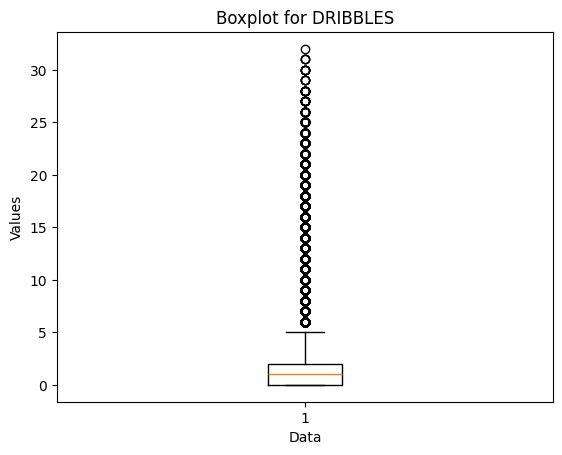

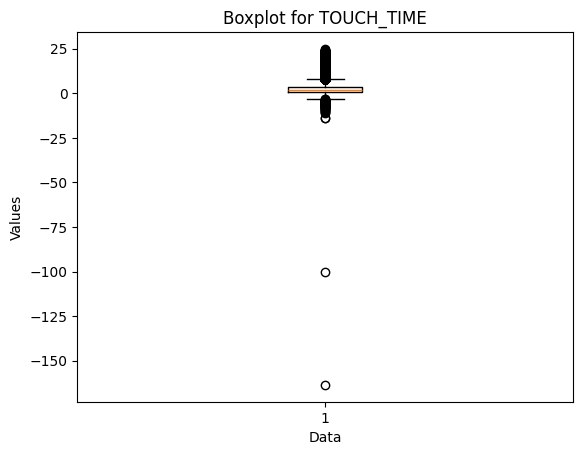

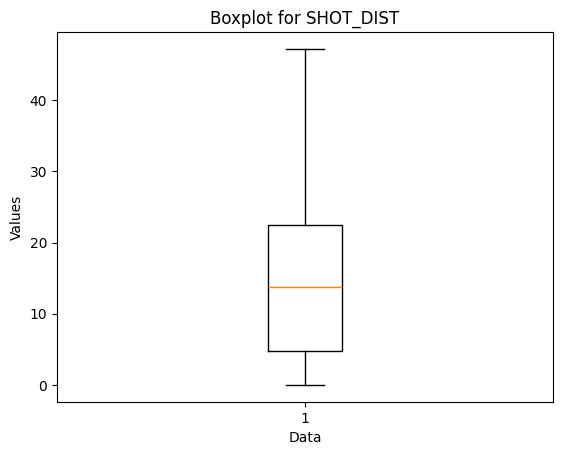

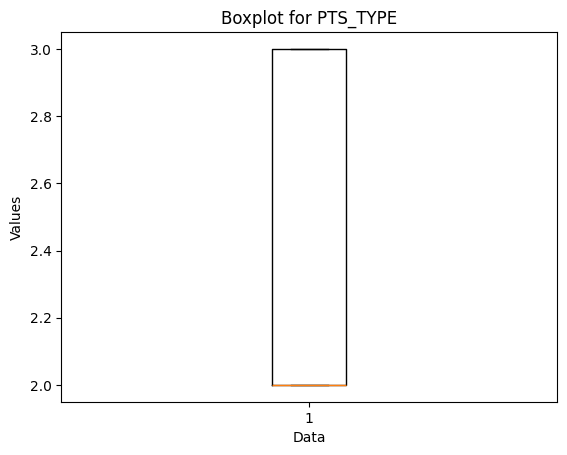

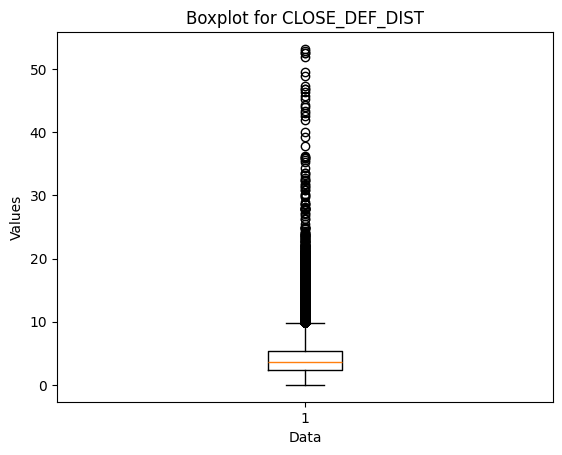

In [33]:
for col in numerical:
    fig, ax=plt.subplots()
    ax.boxplot(numerical[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

In [34]:
game_scenario_columns=['GAME_CLOCK', 'SHOT_CLOCK', 'SHOT_NUMBER','FINAL_MARGIN','PERIOD']
shot_scenario_columns=['DRIBBLES','TOUCH_TIME','SHOT_DIST']
binary_columns=['PTS_TYPE','SHOT_RESULT','PTS']

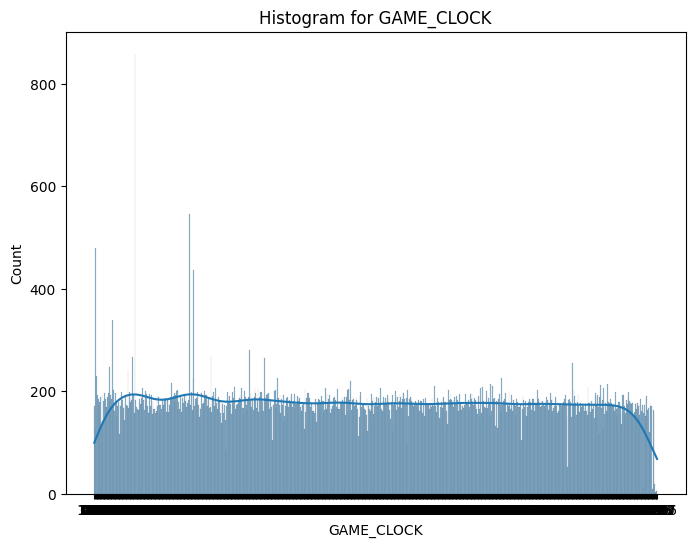

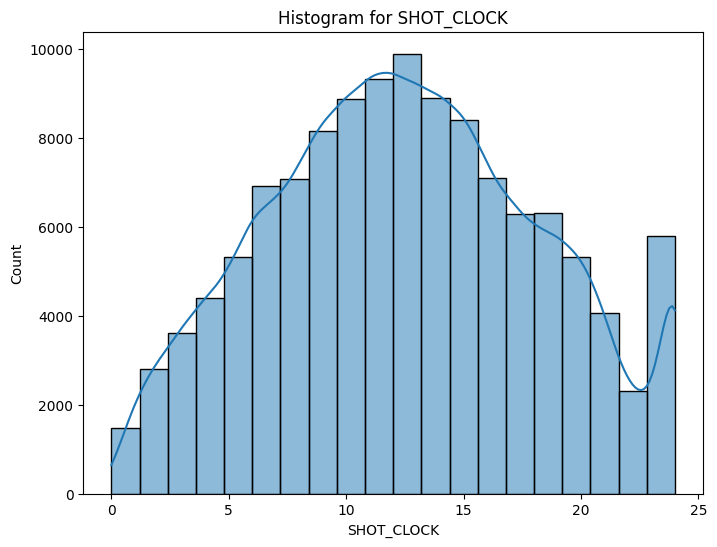

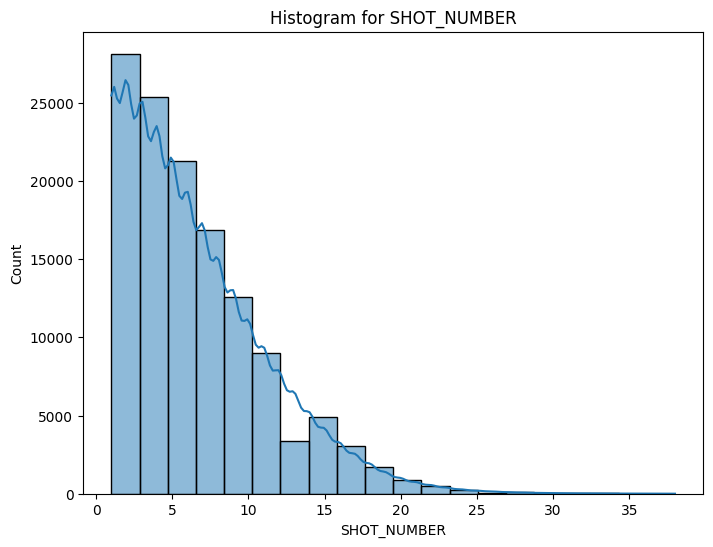

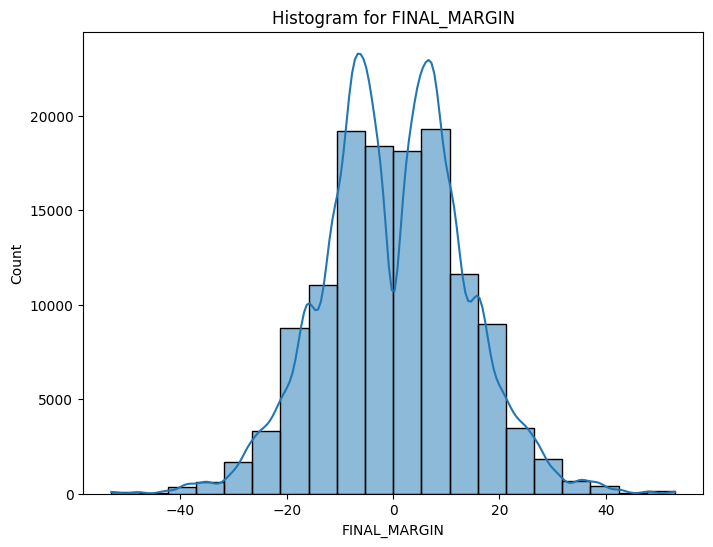

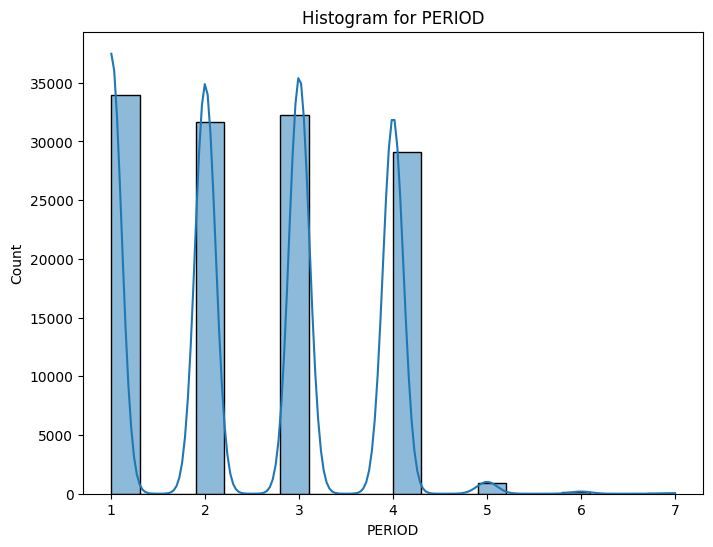

In [35]:
for col in game_scenario_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(logs[col], kde=True, bins=20)
    plt.title(f'Histogram for {col}')

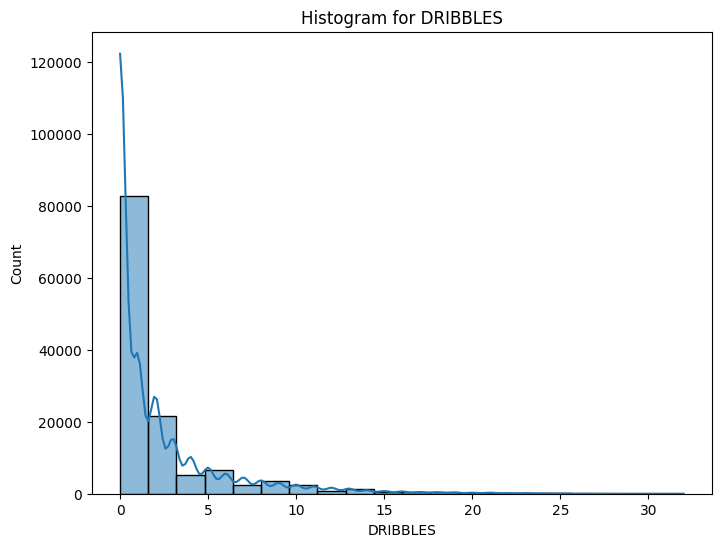

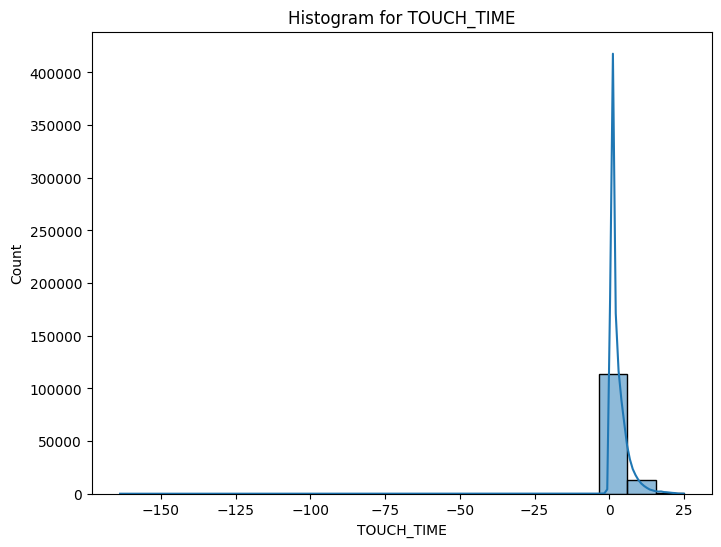

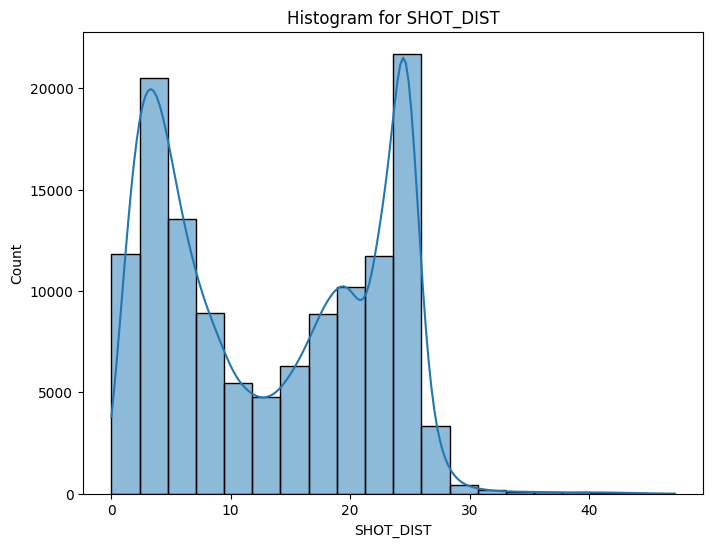

In [36]:
for col in shot_scenario_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(logs[col], kde=True, bins=20)
    plt.title(f'Histogram for {col}')

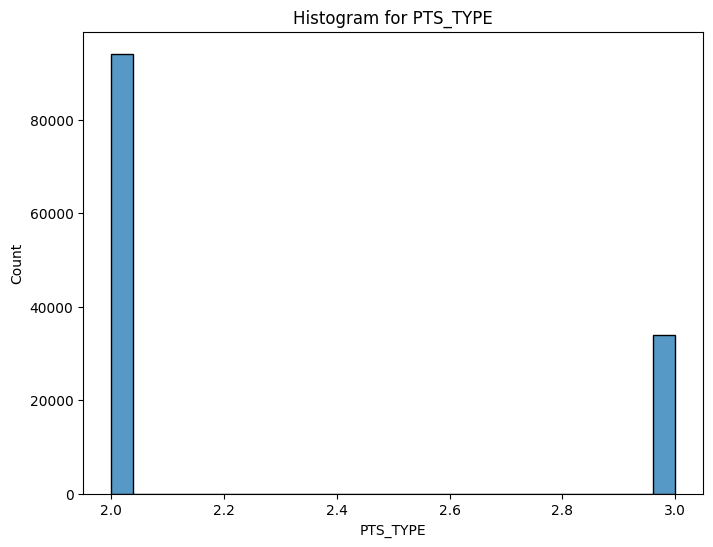

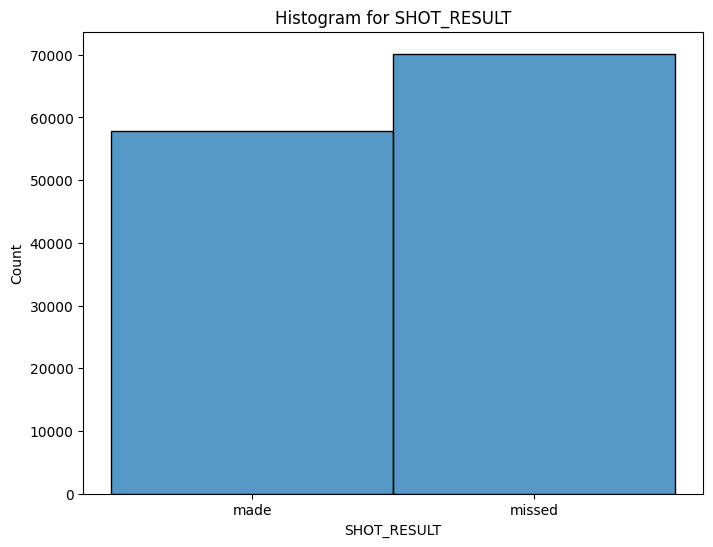

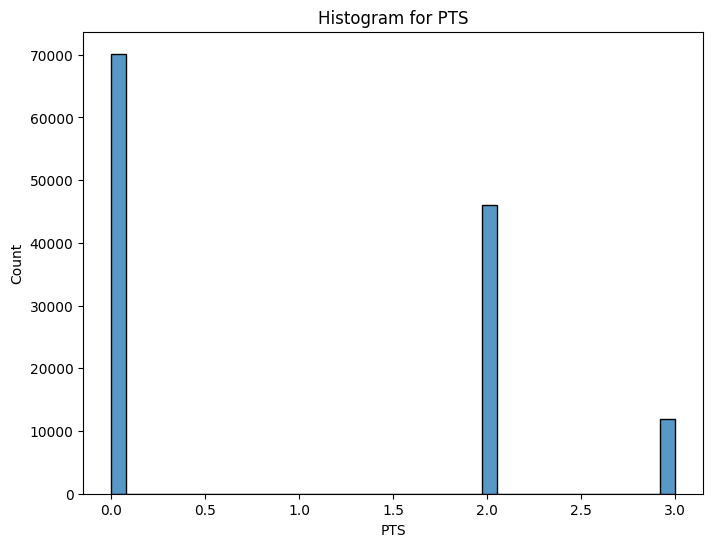

In [37]:
for col in binary_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(logs[col], kde=False)
    plt.title(f'Histogram for {col}')

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_68845/2111213779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values,y=top_10.index, palette='viridis')


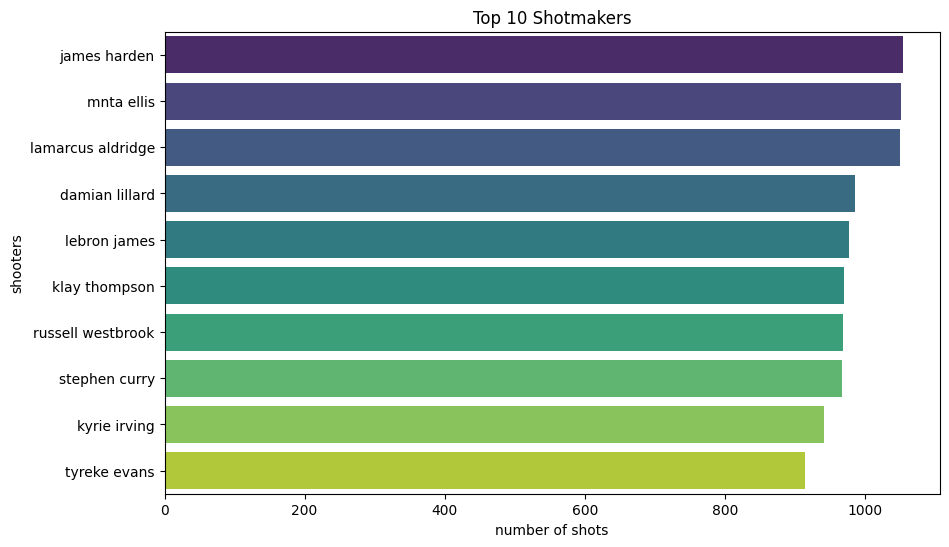

In [38]:
def top_10_shotmakers(df):
    top_10=logs['player_name'].value_counts().nlargest(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_10.values,y=top_10.index, palette='viridis')
    plt.title('Top 10 Shotmakers')
    plt.xlabel('number of shots')
    plt.ylabel('shooters')
    plt.show()

top_10_shotmakers(logs['player_name'])

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_68845/2086779112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values,y=top_10.index, palette='viridis')


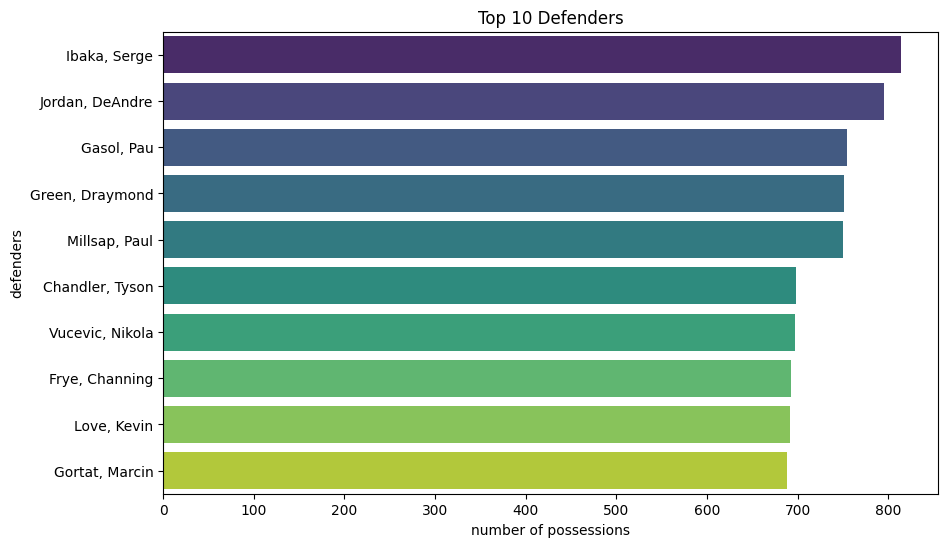

In [39]:
def top_10_defenders(df):
    top_10=logs['CLOSEST_DEFENDER'].value_counts().nlargest(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_10.values,y=top_10.index, palette='viridis')
    plt.title('Top 10 Defenders')
    plt.xlabel('number of possessions')
    plt.ylabel('defenders')
    plt.show()

top_10_defenders(logs['CLOSEST_DEFENDER'])